In [1]:
import sys
sys.path.append('D:/code/pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.spaceprop import density,CubeGrid,wfnfunc
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

动态链接库目录 D:\code\pywfn\pywfn\libs
当前系统:windows, 动态链接库目录D:\code\pywfn\pywfn\libs


In [2]:
path=rf"D:/gfile/HFV/键级分解/CH3-CH3.log"
# path=rf"D:/gfile/pywfn/H2O_dimer.out"
mol=Mol(LogReader(path))

In [3]:
caler=wfnfunc.Calculator(mol)
grids=np.array([[0.,0.,0.]])
print(grids.shape)
wfns0,wfns1,wfns2=caler.atoWfns(grids,2)
obt=mol.O_obts[-1]
print(obt)
print(wfns0[obt])
print(wfns1[obt])
print(wfns2[obt])

(1, 3)
8
[-0.1566]
[[0.     0.     0.0319]]
[[[    nan     nan     nan]
  [    nan     nan     nan]
  [    nan     nan -0.1754]]]


In [4]:
caler=density.Calculator(mol)
grids=np.array([[1.,1.,1.]])
print(grids.shape)
dens0,dens1,dens2=caler.molDens(grids,2)
L=np.linalg.norm(dens1,axis=1)
K=1/(2*(3*np.pi**2)**(1/3))
rdg=K*L/dens0**(4/3)
print(dens0)
print(dens1)
print(rdg)
print(dens2)

(1, 3)
[0.0223]
[[-0.0275  0.0381 -0.0228]]
[1.3462]
[[[ 0.     -0.      0.    ]
  [-0.      0.0001 -0.    ]
  [ 0.     -0.     -0.    ]]]


In [5]:
wfns0,wfns1,wfns2=wfnfunc.Calculator(mol).atoWfns(grids,2)
wfns2[3,0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
p0,p1=mol.molBorder
shape,grids=CubeGrid().set_v1(p0,p1,0.2,4).get()
dens0,dens1,dens2=caler.molDens(grids,2)


In [7]:
L=np.linalg.norm(dens1,axis=1)
K=1/(2*(3*np.pi**2)**(1/3))
rdg=K*L/dens0**(4/3)

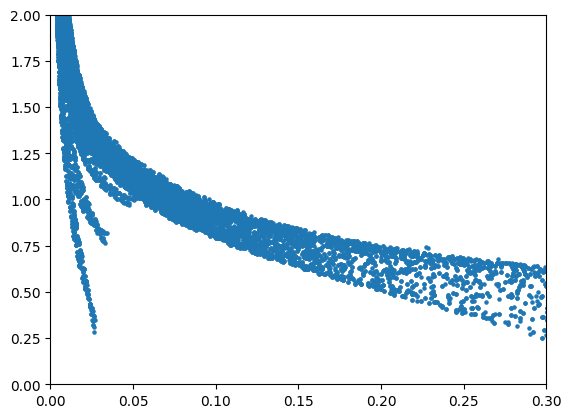

In [ ]:
plt.ylim(0,2)
plt.xlim(0,0.3)
plt.scatter(dens0,rdg,s=5)

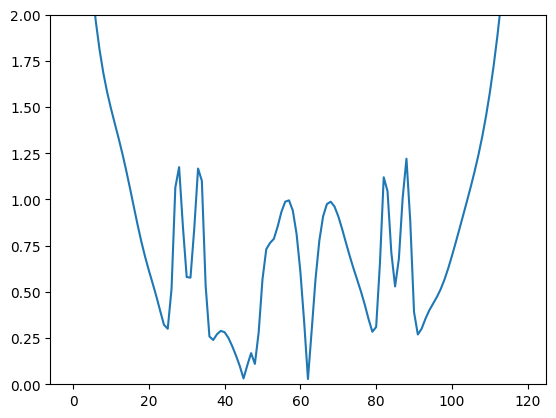

In [18]:
from pywfn.spaceprop import LineGrid,density
r=6.0
p0=np.array([0,-1,0])*r
p1=np.array([0,1,0])*r
shape,grids=LineGrid().set(p0,p1,0.1).get()
vals=density.Calculator(mol).RDG(grids)
plt.ylim(0,2)
plt.plot(vals)